In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import SimpleRNN
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv('city_temperature.csv')
data = df['AvgTemperature'].values.reshape(-1, 1)


C:\Users\HP\AppData\Local\Temp\ipykernel_1680\2725964759.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('city_temperature.csv')


In [5]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [6]:

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, 10)

In [7]:

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:

model = Sequential([
    SimpleRNN(32, input_shape=(10, 1)),
    Dense(1)
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 238s 3ms/step - loss: 0.3511 - val_loss: 0.1053
Epoch 2/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 258s 3ms/step - loss: 0.3393 - val_loss: 0.1046
Epoch 3/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 234s 3ms/step - loss: 0.3375 - val_loss: 0.1062
Epoch 4/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 235s 3ms/step - loss: 0.3363 - val_loss: 0.1044
Epoch 5/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 233s 3ms/step - loss: 0.3368 - val_loss: 0.1050
Epoch 6/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 234s 3ms/step - loss: 0.3362 - val_loss: 0.1054
Epoch 7/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 273s 3ms/step - loss: 0.3362 - val_loss: 0.1057
Epoch 8/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 269s 3ms/step - loss: 0.3360 - val_loss: 0.1047
Epoch 9/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 239s 3ms/step - loss: 0.3349 - val_loss: 0.1061
Epoch 10/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 241s 3ms/step - loss: 0.3380 - val_loss: 0.1065
Epoch 11/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 246s 3ms/step - loss: 0.3382 - val

In [10]:

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

18165/18165 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step


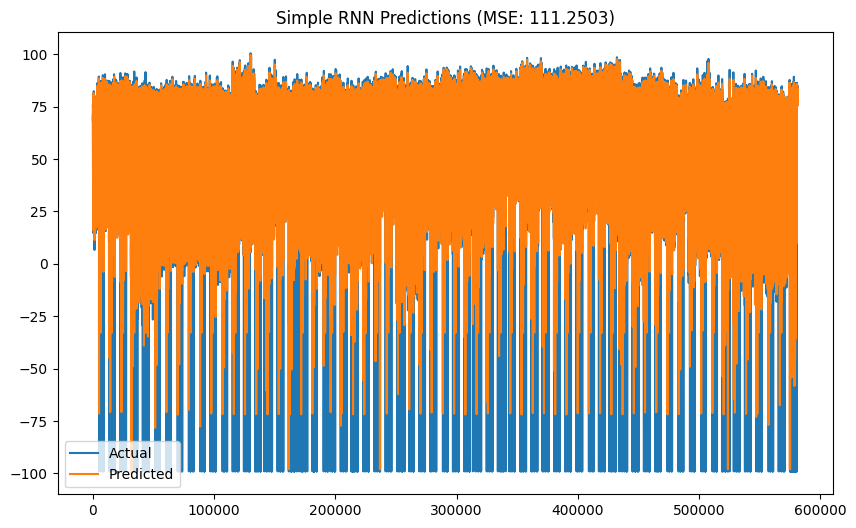

In [11]:

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(f"Simple RNN Predictions (MSE: {np.mean((y_test_actual - predictions)**2):.4f})")
plt.legend()
plt.show()